# Starbucks Capstone Project
## By Wilfredo Villalobos

## Data Preparation

Importing all the useful libraries, in order to run every important step of the project (in some other steps there may be some other libraries imported apart from this one):

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
%matplotlib inline

Reading the files contained in the "data" folder:

In [2]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### Portfolio

How many rows and columns do we have in the **portfolio** dataset?

In [3]:
rows, cols = portfolio.shape
print(f'There are {rows} rows and {cols} columns.\n')
portfolio

There are 10 rows and 6 columns.



,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### Profile

How many rows and columns do we have in the **profile** dataset?

In [4]:
rows, cols = profile.shape
print(f'There are {rows} rows and {cols} columns.\n')
profile.head()

There are 17000 rows and 5 columns.



,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
cust = len(profile['id'].unique().tolist())
print(f'On {len(profile)} records we have {cust} customers')

On 17000 records we have 17000 customers


The validation made before is made in order to detect if there are some duplicate profiles, but it is displayed that every row of information contains a unique profile.

Transforming the "member_on" variable:

In [6]:
profile['member_on'] = pd.to_datetime(profile['became_member_on'].astype(str)).dt.date
profile.drop('became_member_on', 1, inplace=True)

In [7]:
profile.loc[profile['gender'].isnull()].describe()

,age,income
count,2175.0,0.0
mean,118.0,NaN
std,0.0,NaN
min,118.0,NaN
25%,118.0,NaN
50%,118.0,NaN
75%,118.0,NaN
max,118.0,NaN


There are 2175 rows with null data in the "gender" variable. Also, every age data of the nulls mentioned before are outliers (118 years).

In [8]:
profile = profile.loc[profile['gender'].isnull() == False]

rows, cols = profile.shape
print(f'After data preparation, we have {rows} rows and {cols} columns.\n')

After data preparation, we have 14825 rows and 5 columns.



/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


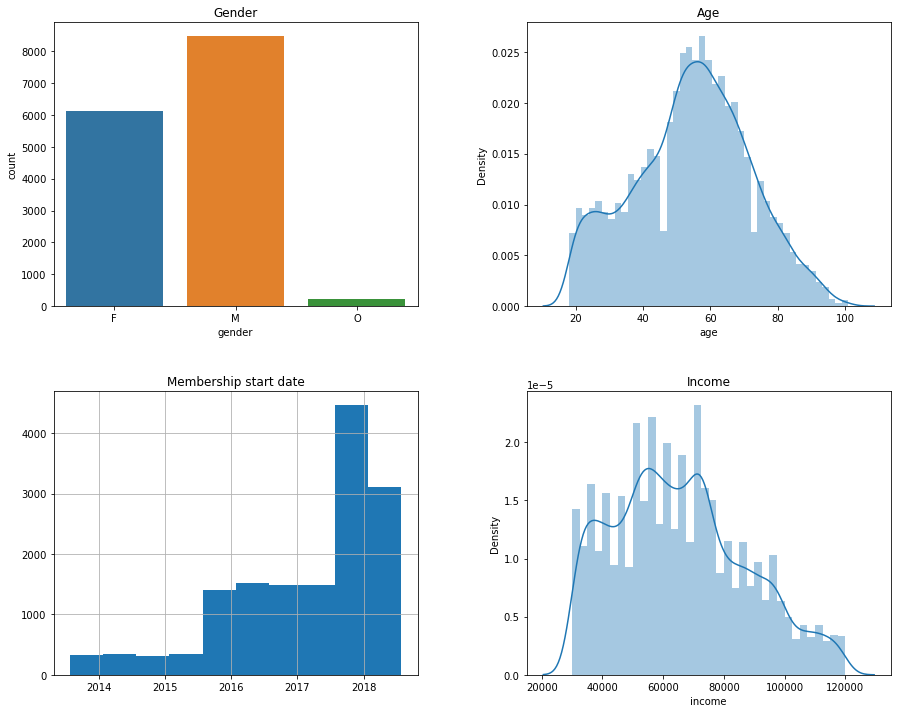


Membership start dates range from 2013-07-29 to 2018-07-26.



In [9]:
plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(221)
plt.title('Gender')
sns.countplot(x='gender', data=profile)

plt.subplot(222)
plt.title('Age')
sns.distplot(profile['age'])

plt.subplot(223)
plt.title('Membership start date')
profile['member_on'].hist()

plt.subplot(224)
plt.title('Income')
sns.distplot(profile['income'])

plt.show()


print('\nMembership start dates range from {} to {}.\n'.format(
    profile['member_on'].min().strftime('%Y-%m-%d'), profile['member_on'].max().strftime('%Y-%m-%d')
))

About **Gender**, there are three types: 
- Male
- Female
- Other

About **Age**, the distribution does look kind of normally distributed but it can still be worked.

About **Membership**, it can be seen that most of the profiles are members since 2018.

About **Income**, the distribution seems logical.

### Transcript

How many rows and columns are in the **Transcript** dataset?

In [10]:
rows, cols = transcript.shape
print(f'There are {rows} rows and {cols} columns.\n')
transcript.head(10)

There are 306534 rows and 4 columns.



,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


Here you can see the events and how many times they appear in the **Transcript** dataset:

In [11]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [12]:
keys = transcript['value'].apply(lambda x: str(list(x.keys())))

pd.crosstab(keys, transcript['event'])

event,offer completed,offer received,offer viewed,transaction
value,,,,
['amount'],0,0,0,138953
['offer id'],0,76277,57725,0
"['offer_id', 'reward']",33579,0,0,0


In [13]:
for k in ['reward', 'amount']:
    transcript[k] = transcript['value'].apply(lambda x: x[k] if k in x else None)
    
transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer_id'] if 'offer_id' in x else (x['offer id'] if 'offer id' in x else None))
transcript.drop('value', 1, inplace=True)

In [14]:
transcript['time'].describe()

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

Grouping transcript by customer, and sorting by values of time:

In [15]:
cust_list = transcript.groupby('person')['time'].count()
cust_list.sort_values(ascending=False).head(3)

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
Name: time, dtype: int64

In [16]:
transcript.loc[transcript['person'] == cust_list.index[0]].sort_values('time')

,person,event,time,reward,amount,offer_id
55972,0009655768c64bdeb2e877511632db8f,offer received,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
89291,0009655768c64bdeb2e877511632db8f,transaction,228,NaN,22.16,None
113605,0009655768c64bdeb2e877511632db8f,offer received,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed
153401,0009655768c64bdeb2e877511632db8f,offer received,408,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
168412,0009655768c64bdeb2e877511632db8f,transaction,414,NaN,8.57,None
168413,0009655768c64bdeb2e877511632db8f,offer completed,414,5.0,NaN,f19421c1d4aa40978ebb69ca19b0e20d
187554,0009655768c64bdeb2e877511632db8f,offer viewed,456,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
204340,0009655768c64bdeb2e877511632db8f,offer received,504,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4


#### Merging Data

In [17]:
tmp = pd.merge(transcript.loc[transcript['event'] == 'offer completed'],
               transcript.loc[transcript['event'] == 'transaction', ['person', 'event', 'time']],
               on=['person', 'time'])

print('There are {} offer completed.'.format(sum(transcript['event'] == 'offer completed')))
print('There are {} matches.'.format(tmp.shape[0]))

There are 33579 offer completed.
There are 33579 matches.


In [18]:
tmp = pd.merge(transcript.loc[transcript['event'] == 'offer viewed'].reset_index(),
               transcript.loc[transcript['event'] == 'offer received', ['person', 'time', 'offer_id']],
               on=['person', 'offer_id'])

print('There are {} offer viewed.'.format(sum(transcript['event'] == 'offer viewed')))
print('There are {} matches.'.format(len(tmp['index'].unique())))

There are 57725 offer viewed.
There are 57725 matches.


Here, we start merging the received offers with the relative view. Then, we take the reception before of the view (or whether it was viewed or not). Then, we take the nearest reception before the view, and concatenate the missing views.

In [19]:
# Merging received offers with the relative view
views = pd.merge(transcript.loc[transcript['event'] == 'offer received', ['person', 'offer_id', 'time']],
                 transcript.loc[transcript['event'] == 'offer viewed', ['person', 'offer_id', 'time']],
                 on=['person', 'offer_id'], how='left', suffixes=['_received', '_viewed'])

# Taking the receptions before views (or watching if it was not viewed)
views = views.loc[(views['time_viewed'] >= views['time_received']) | (views['time_viewed'].isnull())]

# Taking the nearest reception before the view, and concatenating missing values. These records will result excluded later.
views = pd.concat((views.groupby(['person', 'offer_id', 'time_viewed']).agg({'time_received': 'max'}).reset_index(),
                  views.loc[views['time_viewed'].isnull()]),
                  axis=0, sort=True)

views.head()

,offer_id,person,time_received,time_viewed
0,3f207df678b143eea3cee63160fa8bed,0009655768c64bdeb2e877511632db8f,336,372.0
1,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,168,192.0
2,f19421c1d4aa40978ebb69ca19b0e20d,0009655768c64bdeb2e877511632db8f,408,456.0
3,fafdcd668e3743c1bb461111dcafc2a4,0009655768c64bdeb2e877511632db8f,504,540.0
4,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,168,216.0


In [20]:
# Merging information about completion of offers.
comp = pd.merge(views,
                transcript.loc[transcript['event'] == 'offer completed', ['person', 'offer_id', 'time', 'reward']],
                on=['person', 'offer_id'], how='left').rename(columns={'time': 'time_completed'})

# Completion will be considered null if it is before the offer is viewed. That is because it can not be completed if it is not viewed before.
comp.loc[(comp['time_viewed'].isnull()) | (comp['time_viewed'] > comp['time_completed']), ['time_completed', 'reward']] = (np.nan, np.nan)
comp.drop_duplicates(inplace=True)

comp = pd.concat(
    (comp.groupby(['person', 'offer_id', 'time_completed', 'reward']).agg({'time_viewed': 'max', 'time_received': 'max'}).reset_index(),
     comp.loc[comp['time_completed'].isnull()]),
    axis=0, sort=True
)

comp.head()

,offer_id,person,reward,time_completed,time_received,time_viewed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,408,432.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,3.0,252.0,168,186.0
2,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,504,516.0
3,4d5c57ea9a6940dd891ad53e9dbe8da0,0020c2b971eb4e9188eac86d93036a77,10.0,510.0,408,426.0
4,fafdcd668e3743c1bb461111dcafc2a4,0020c2b971eb4e9188eac86d93036a77,2.0,54.0,0,12.0


In [21]:
# Merging information about relative transactions (events).
journey = pd.merge(comp,
                   transcript.loc[transcript['event'] == 'transaction', ['person', 'time', 'amount']],
                   left_on=['person', 'time_completed'], right_on=['person', 'time'], how='outer').rename(columns={'time': 'time_transaction'})

# Create a reference time - received for offer, transaction otherwise
journey['time'] = journey['time_received']
journey.loc[journey['time'].isnull(), 'time'] = journey['time_transaction']

# Offers completed twice are removed because of duplicates.
journey.sort_values(['person', 'offer_id', 'time', 'time_completed'], inplace=True)
journey = journey.drop_duplicates(['person', 'offer_id', 'time'])

journey = journey[['person', 'offer_id', 'time', 'time_received', 'time_viewed', 'time_completed', 'time_transaction', 'amount', 'reward']]

rows, cols = journey.shape
print(f'There are {rows} rows and {cols} columns.\n')
journey.head()

There are 188234 rows and 9 columns.



,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward
24618,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN
24614,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN
24615,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN
24616,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN
24617,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN


In [22]:
# Merging the journey information to have every step in the sales funnel.
tmp = pd.merge(journey,
               portfolio.rename(columns={'reward': 'pot_reward', 'id': 'offer_id'}),
               on='offer_id', how='left')

tmp.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,pot_reward,channels,difficulty,duration,offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount


Merging profile information:

In [23]:
df = pd.merge(tmp,
              profile.rename(columns={'id': 'person'}),
              how='inner', on='person')

# To better visualize the journey, let's order by the offer received time / transaction time
df.sort_values(['person', 'time', 'offer_id'], inplace=True)

# For transactions we put a specific "offer type"
df['offer_type'].fillna('transaction', inplace=True)

rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns.\n')
df.head()

There are 164838 rows and 18 columns.



,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,pot_reward,channels,difficulty,duration,offer_type,gender,age,income,member_on
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational,M,33,72000.0,2017-04-21
5,0009655768c64bdeb2e877511632db8f,NaN,228.0,NaN,NaN,NaN,228.0,22.16,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational,M,33,72000.0,2017-04-21
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,33,72000.0,2017-04-21
6,0009655768c64bdeb2e877511632db8f,NaN,414.0,NaN,NaN,NaN,414.0,8.57,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21


Some profiles are excluded, responding to the need of dropping them, as they were nulls and outliers.

In [24]:
df.to_csv('./data/journey.csv', index=False)

## Feature Engineering

Importing more useful libraries (it may contain some repeated libraries from the starting import query):

In [25]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from lib.utils import analyse_cat_var, analyse_num_var

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [26]:
df = pd.read_csv('data/journey.csv', parse_dates=['member_on'])

# Dropping information of offers received but not viewed
df = df.loc[(df['offer_type'] == 'transaction') | (df['time_viewed'].isnull() == False)]

df['time'] = df['time_viewed']
df.loc[df['offer_type'] == 'transaction', 'time'] = df['time_transaction']

df.sort_values(['person', 'time', 'offer_id'], inplace=True)

print(df.shape)
df.head()

(150435, 18)


,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,pot_reward,channels,difficulty,duration,offer_type,gender,age,income,member_on
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192.0,168.0,192.0,NaN,NaN,NaN,NaN,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,M,33,72000.0,2017-04-21
1,0009655768c64bdeb2e877511632db8f,NaN,228.0,NaN,NaN,NaN,228.0,22.16,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21
2,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,372.0,336.0,372.0,NaN,NaN,NaN,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,M,33,72000.0,2017-04-21
4,0009655768c64bdeb2e877511632db8f,NaN,414.0,NaN,NaN,NaN,414.0,8.57,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,456.0,408.0,456.0,NaN,NaN,NaN,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,M,33,72000.0,2017-04-21


In [27]:
tmp = df.loc[:, ['offer_type', 'time_viewed', 'time_completed']]

# Offer viewed flag
tmp['flg_viewed'] = 0
tmp.loc[(tmp['offer_type'].isin(['bogo', 'discount'])) & (tmp['time_viewed'].isnull() == False), 'flg_viewed'] = 1


# Conversion flag
tmp['flg_conv'] = 0
tmp.loc[
    (tmp['offer_type'].isin(['bogo', 'discount'])) & (tmp['time_viewed'].isnull() == False) & (df['time_completed'].isnull() == False),
    'flg_conv'
] = 1

num = sum(tmp['flg_conv'])
den = sum(tmp['flg_viewed'])
print(f'There are {den} viewed offers.')
print(f'There are {num} completed offers.')
print(f'\n\nThe Conversion Rate is {round((num / den) * 100, 2)}%; it is divided as follows')


display(tmp.loc[tmp['flg_viewed'] == 1].groupby('offer_type').agg({'flg_conv': 'mean'}))

del tmp

There are 39725 viewed offers.
There are 22816 completed offers.


The Conversion Rate is 57.43%; it is divided as follows


,flg_conv
offer_type,
bogo,0.504744
discount,0.657340


In [28]:
# Copying the dataset.
inf = df.loc[(df['time_viewed'].isnull() == False) | (df['time_transaction'].isnull() == False),
             ['person', 'offer_id', 'offer_type', 'time_viewed', 'time_transaction']]
inf['time'] = inf['time_viewed']
inf.loc[inf['time'].isnull(), 'time'] = inf['time_transaction']
inf.sort_values(['person', 'time', 'offer_id'], inplace=True)

# Shifting the information of the subsequent record.
inf['sub_offer_type'] = inf['offer_type'].shift(-1)
inf['sub_time'] = inf['time'].shift(-1)
# If the next record is relative to another customer, we put it as a missing value.
inf.loc[inf['person'].shift(-1) != inf['person'], ['sub_offer_type', 'sub_time']] = ['', np.nan]

# Finally we calculate the time difference
inf['time_diff_with_sub'] = inf['sub_time'] - inf['time_viewed']

count    6790.000000
mean       43.230928
std        56.776195
min         0.000000
25%         6.000000
50%        24.000000
75%        54.000000
max       552.000000
Name: time_diff_with_sub, dtype: float64

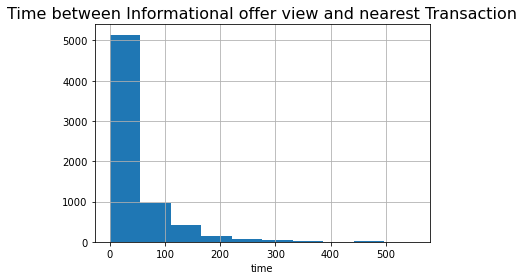

In [29]:
display(inf.loc[(inf['offer_type'] == 'informational') & (inf['sub_offer_type'] == 'transaction'), 'time_diff_with_sub'].describe())

print('\n\n')

inf.loc[(inf['offer_type'] == 'informational') & (inf['sub_offer_type'] == 'transaction'), 'time_diff_with_sub'].hist()
plt.title('Time between Informational offer view and nearest Transaction', size=16)
plt.xlabel('time')
plt.show()

How many informational offers there are?

In [30]:
threshold = 24

num = sum((inf['offer_type'] == 'informational') & (inf['sub_offer_type'] == 'transaction') & (inf['time_diff_with_sub'] <= threshold))
den = sum(inf['offer_type'] == 'informational')
print(f'There are {den} informational offers.')
print(f'There are {num} conversions with a response time of {threshold} hours.')
print(f'The Conversion Rate is {round((num / den) * 100, 2)}%.')

There are 9360 informational offers.
There are 3634 conversions with a response time of 24 hours.
The Conversion Rate is 38.82%.


In [31]:
# BOGO target
df.loc[(df['time_viewed'].isnull() == False) & (df['offer_type'] == 'bogo'), 'bogo'] = 0
df.loc[(df['time_viewed'].isnull() == False) & (df['offer_type'] == 'bogo') & (df['time_completed'].isnull() == False), 'bogo'] = 1

# Discount target
df.loc[(df['time_viewed'].isnull() == False) & (df['offer_type'] == 'discount'), 'discount'] = 0
df.loc[(df['time_viewed'].isnull() == False) & (df['offer_type'] == 'discount') & (df['time_completed'].isnull() == False), 'discount'] = 1

In [32]:
# For the informational target, we use the previously created inf dataset, define the logistic, then merge with df
inf.loc[inf['offer_type'] == 'informational', 'info'] = 0
inf.loc[(inf['offer_type'] == 'informational') & (inf['sub_offer_type'] == 'transaction') & (inf['time_diff_with_sub'] <= threshold), 'info'] = 1

df = pd.merge(df,
              inf.loc[inf['info'].isnull() == False, ['person', 'offer_id', 'time_viewed', 'info', 'sub_time']],
              how='left', on=['person', 'offer_id', 'time_viewed'])

# Let's force time_completed equal to time_transaction for informational data
df.loc[df['info'] == 1, 'time_completed'] = df['sub_time']
df.loc[df['info'] == 1, 'time_transaction'] = df['sub_time']
df.drop('sub_time', 1, inplace=True)

Records per type of promotion:

In [33]:
print('There are:')
print('- {} records for BOGO target'.format(sum(df['bogo'].isnull() == False)))
print('- {} records for Discount target'.format(sum(df['discount'].isnull() == False)))
print('- {} records for Informational target'.format(sum(df['info'].isnull() == False)))

There are:
- 21605 records for BOGO target
- 18120 records for Discount target
- 9360 records for Informational target


In [34]:
customers = df[['person', 'gender', 'age', 'income', 'member_on']].drop_duplicates()

display(customers.describe(include='all').transpose())

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  app.launch_new_instance()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
person,14815,14815,b834c0ff6f2f4a08a39b2122a6a45f7e,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,14815,3,M,8477,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,14815,NaN,NaN,NaN,NaT,NaT,54.3931,17.3866,18,42,55,66,101
income,14815,NaN,NaN,NaN,NaT,NaT,65397.8,21598.6,30000,49000,64000,80000,120000
member_on,14815,1707,2017-08-19 00:00:00,39,2013-07-29,2018-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from datetime import datetime

def diff_month(d1, d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month

In [36]:
# Transform hours to days
df['day'] = np.floor(df['time_viewed'] / 24)

# Weekday
df['dow'] = df['day'].mod(7)

# Member since
df['member_from'] = df.apply(lambda x: diff_month(x['member_on'], datetime(2018, 8, 1)), 1)
df.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,pot_reward,channels,difficulty,duration,offer_type,gender,age,income,member_on,bogo,discount,info,day,dow,member_from
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192.0,168.0,192.0,NaN,NaN,NaN,NaN,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,M,33,72000.0,2017-04-21,NaN,NaN,0.0,8.0,1.0,16
1,0009655768c64bdeb2e877511632db8f,NaN,228.0,NaN,NaN,NaN,228.0,22.16,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21,NaN,NaN,NaN,NaN,NaN,16
2,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,372.0,336.0,372.0,NaN,NaN,NaN,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,M,33,72000.0,2017-04-21,NaN,NaN,0.0,15.0,1.0,16
3,0009655768c64bdeb2e877511632db8f,NaN,414.0,NaN,NaN,NaN,414.0,8.57,NaN,NaN,NaN,NaN,NaN,transaction,M,33,72000.0,2017-04-21,NaN,NaN,NaN,NaN,NaN,16
4,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,456.0,408.0,456.0,NaN,NaN,NaN,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,M,33,72000.0,2017-04-21,0.0,NaN,NaN,19.0,5.0,16


Here are some plots that describe the following variables:
- Offer day
- Offer day of week
- Month of membership

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

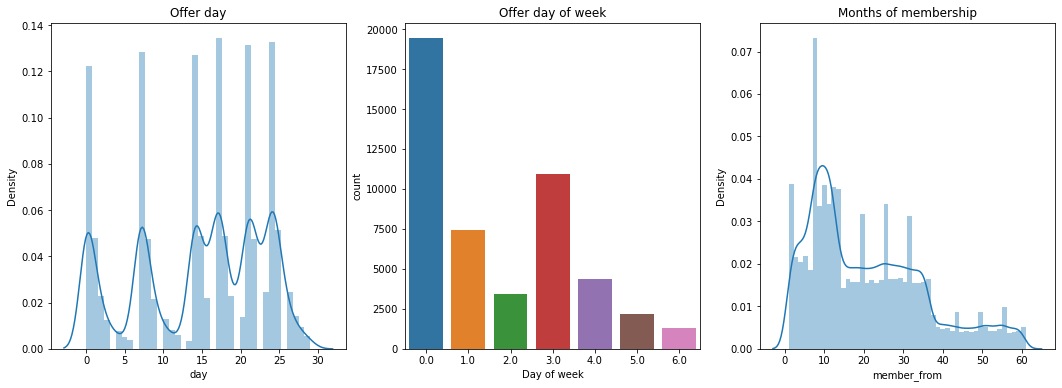

In [37]:
plt.subplots(1, 3, figsize=(18, 6))

plt.subplot(131)
plt.title('Offer day')
sns.distplot(df['day'].dropna())

plt.subplot(132)
plt.title('Offer day of week')
sns.countplot(df['dow'].dropna())
plt.xlabel('Day of week')

plt.subplot(133)
plt.title('Months of membership')
sns.distplot(df['member_from'].dropna())

plt.show()

In [38]:
df.reset_index(drop=True, inplace=True)

# First, let's initialize all those features + some temporary ones to save data

# flag if the row has a transaction
df['is_transaction'] = 0 
df.loc[df['time_transaction'].isnull() == False, 'is_transaction'] = 1
# flag if the row has an offer completed
df['is_completed'] = 0
df.loc[df['time_completed'].isnull() == False, 'is_completed'] = 1

df['n_offers_completed'] = 0
df['n_offers_viewed'] = 0
df['n_transactions'] = 0
df['avg_transctions'] = 0
df['avg_reward'] = 0
df['reception_to_view'] = df['time_viewed'] - df['time_received']
df['view_to_completion'] = df['time_completed'] - df['time_viewed']
df['reception_to_view_avg'] = 0
df['view_to_completion_avg'] = 0

# Customer of previous row - to check if the customer is the same
df['prev_person'] = df['person'].shift(1)

for i, row in df.iterrows():
    if i % 10000 == 0: # print advancement
        print(i)
    if row['person'] == row['prev_person']: # modify data only if the previous customer is the same as the current one
        # Add 1 if previous offer was viewed
        df.loc[i, 'n_offers_viewed'] = df.loc[i-1, 'n_offers_viewed'] + (0 if df.loc[i-1, 'offer_type'] == 'transaction' else 1)
        # Add 1 if previous offer was completed
        df.loc[i, 'n_offers_completed'] = df.loc[i-1, 'n_offers_completed'] + df.loc[i-1, 'is_completed']
        # Add previous time from reception to view
        df.loc[i, 'reception_to_view_avg'] = np.nansum((df.loc[i-1, 'reception_to_view_avg'], df.loc[i-1, 'reception_to_view']))
        # Add previous time from view to completion
        df.loc[i, 'view_to_completion_avg'] = np.nansum((df.loc[i-1, 'view_to_completion_avg'], df.loc[i-1, 'view_to_completion']))
        # Add 1 if previous row was a transaction
        df.loc[i, 'n_transactions'] = df.loc[i-1, 'n_transactions'] + df.loc[i-1, 'is_transaction']
        # Add previous amount if previous row was a transaction
        df.loc[i, 'avg_transctions'] = df.loc[i-1, 'avg_transctions'] + (0 if df.loc[i-1, 'is_transaction'] == 0 else df.loc[i-1, 'amount'])
        # Add previous reward if previous row has a reward
        df.loc[i, 'avg_reward'] = np.nansum((df.loc[i-1, 'avg_reward'], df.loc[i-1, 'reward']))        

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [39]:
# Calculate the averages from the sums
df['reception_to_view_avg'] /= df['n_offers_viewed']
df['view_to_completion_avg'] /= df['n_offers_completed']
df['avg_transctions'] /= df['n_transactions']
df['reception_to_view_avg'].fillna(0, inplace=True)
df['view_to_completion_avg'].fillna(0, inplace=True)
df['avg_transctions'].fillna(0, inplace=True)

In [40]:
df.tail(20)

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,pot_reward,channels,difficulty,duration,offer_type,gender,age,income,member_on,bogo,discount,info,day,dow,member_from,is_transaction,is_completed,n_offers_completed,n_offers_viewed,n_transactions,avg_transctions,avg_reward,reception_to_view,view_to_completion,reception_to_view_avg,view_to_completion_avg,prev_person
150415,fffad4f4828548d1b5583907f2e9906b,NaN,558.0,NaN,NaN,NaN,558.0,7.97,NaN,NaN,NaN,NaN,NaN,transaction,M,34,34000.0,2017-01-23,NaN,NaN,NaN,NaN,NaN,19,1,0,2,3,9,6.980000,10.0,NaN,NaN,36.0,18.0,fffad4f4828548d1b5583907f2e9906b
150416,fffad4f4828548d1b5583907f2e9906b,NaN,588.0,NaN,NaN,NaN,588.0,10.98,NaN,NaN,NaN,NaN,NaN,transaction,M,34,34000.0,2017-01-23,NaN,NaN,NaN,NaN,NaN,19,1,0,2,3,10,7.079000,10.0,NaN,NaN,36.0,18.0,fffad4f4828548d1b5583907f2e9906b
150417,fffad4f4828548d1b5583907f2e9906b,9b98b8c7a33c4b65b9aebfe6a799e6d9,666.0,576.0,666.0,NaN,NaN,NaN,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,M,34,34000.0,2017-01-23,0.0,NaN,NaN,27.0,6.0,19,0,0,2,3,11,7.433636,10.0,90.0,NaN,36.0,18.0,fffad4f4828548d1b5583907f2e9906b
150418,fffad4f4828548d1b5583907f2e9906b,NaN,678.0,NaN,NaN,NaN,678.0,7.06,NaN,NaN,NaN,NaN,NaN,transaction,M,34,34000.0,2017-01-23,NaN,NaN,NaN,NaN,NaN,19,1,0,2,4,11,7.433636,10.0,NaN,NaN,49.5,18.0,fffad4f4828548d1b5583907f2e9906b
150419,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,6.0,0.0,6.0,60.0,60.0,16.06,2.0,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,F,45,62000.0,2016-11-25,NaN,1.0,NaN,0.0,0.0,21,1,1,0,0,0,0.000000,0.0,6.0,54.0,0.0,0.0,fffad4f4828548d1b5583907f2e9906b
150420,ffff82501cea40309d5fdd7edcca4a07,NaN,78.0,NaN,NaN,NaN,78.0,7.18,NaN,NaN,NaN,NaN,NaN,transaction,F,45,62000.0,2016-11-25,NaN,NaN,NaN,NaN,NaN,21,1,0,1,1,1,16.060000,2.0,NaN,NaN,6.0,54.0,ffff82501cea40309d5fdd7edcca4a07
150421,ffff82501cea40309d5fdd7edcca4a07,NaN,120.0,NaN,NaN,NaN,120.0,9.12,NaN,NaN,NaN,NaN,NaN,transaction,F,45,62000.0,2016-11-25,NaN,NaN,NaN,NaN,NaN,21,1,0,1,1,2,11.620000,2.0,NaN,NaN,6.0,54.0,ffff82501cea40309d5fdd7edcca4a07
150422,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,174.0,168.0,174.0,198.0,198.0,22.88,5.0,5.0,"['web', 'email']",20.0,10.0,discount,F,45,62000.0,2016-11-25,NaN,1.0,NaN,7.0,0.0,21,1,1,1,1,3,10.786667,2.0,6.0,24.0,6.0,54.0,ffff82501cea40309d5fdd7edcca4a07
150423,ffff82501cea40309d5fdd7edcca4a07,NaN,204.0,NaN,NaN,NaN,204.0,15.23,NaN,NaN,NaN,NaN,NaN,transaction,F,45,62000.0,2016-11-25,NaN,NaN,NaN,NaN,NaN,21,1,0,2,2,4,13.810000,7.0,NaN,NaN,6.0,39.0,ffff82501cea40309d5fdd7edcca4a07
150424,ffff82501cea40309d5fdd7edcca4a07,NaN,234.0,NaN,NaN,NaN,234.0,18.08,NaN,NaN,NaN,NaN,NaN,transaction,F,45,62000.0,2016-11-25,NaN,NaN,NaN,NaN,NaN,21,1,0,2,2,5,14.094000,7.0,NaN,NaN,6.0,39.0,ffff82501cea40309d5fdd7edcca4a07


From here, we separate the dataset into three distinct datasets, one per each type of promotion:
- BOGO
- Discount
- Informational

This will help in the modeling part.

In [41]:
import boto3
import sagemaker
from sagemaker import get_execution_role

b_session = boto3.session.Session(region_name='us-east-1')

session = sagemaker.Session(boto_session=b_session)
role = 'c20300a265023l892967t1w27-SageMakerNotebookInstanc-1GB1FRTZCQS6P'

In [42]:
keep_vars = ['gender', 'dow', 'age', 'income', 'day','member_from', 'n_transactions', 'avg_transctions',
             'n_offers_completed', 'n_offers_viewed', 'avg_reward', 'reception_to_view_avg', 'view_to_completion_avg']

In [43]:
df_dict = {}
prefix = 'Capstone_Starbucks'
data_location_dict = {}
for tgt in ['bogo', 'discount', 'info']:
    df_dict[tgt] = df.loc[df[tgt].isnull() == False, [tgt] + keep_vars]
    df_dict[tgt].to_csv(f'./data/{tgt}.csv', index=False, header=False)
    data_location_dict[tgt] = session.upload_data(f'./data/{tgt}.csv', key_prefix=prefix)

In [44]:
data_location_dict

{'bogo': 's3://sagemaker-us-east-1-270950614844/Capstone_Starbucks/bogo.csv',
 'discount': 's3://sagemaker-us-east-1-270950614844/Capstone_Starbucks/discount.csv',
 'info': 's3://sagemaker-us-east-1-270950614844/Capstone_Starbucks/info.csv'}

In [45]:
df_dict = {}
for tgt in ['bogo', 'discount', 'info']:
    df_dict[tgt] = pd.read_csv(f'./data/{tgt}.csv', header=None, names=[tgt] + keep_vars)

## Model

Importing more libraries (apart from the libraries imported before --there may be repetition of libraries again--):

In [46]:
import os
import numpy as np
import pandas as pd
import pprint
import json

from IPython.display import display
from lib.utils import assess_model

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import boto3
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer
from sagemaker import LinearLearner
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner, CategoricalParameter
from sagemaker.sklearn.processing import SKLearnProcessor
from sagemaker.processing import ProcessingInput, ProcessingOutput

b_session = boto3.session.Session(region_name='us-east-1')

session = sagemaker.Session(boto_session=b_session)
role = 'c20300a265023l892967t1w27-SageMakerNotebookInstanc-1GB1FRTZCQS6P'

bucket = session.default_bucket()

Here, we run some Data Preprocessing before of the modeling. We get rid of missing values, we encode categorical variables (Gender), and we finally normalize some numerical variables.

In [48]:
output_configs = {}

for tgt in ['bogo', 'discount', 'info']:
    print(tgt)
    
    sklearn_processor = SKLearnProcessor(framework_version='0.20.0',
                                         role=role,
                                         instance_type='ml.m5.xlarge',
                                         instance_count=1)
    
    sklearn_processor.run(code='lib/preprocessing.py', inputs=[ProcessingInput(os.path.join('s3://', bucket, f'Capstone_Starbucks/{tgt}.csv'),'/opt/ml/processing/input')], outputs=[ProcessingOutput(source=f'/opt/ml/processing/output/', output_name=f'{tgt}_data')], arguments=['--target', tgt])

    preprocessing_job_description = sklearn_processor.jobs[-1].describe()
    output_configs[tgt] = preprocessing_job_description['ProcessingOutputConfig']

bogo

Job Name:  sagemaker-scikit-learn-2021-11-07-00-39-42-331
Inputs:  [{'InputName': 'input-1', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-270950614844/Capstone_Starbucks/bogo.csv', 'LocalPath': '/opt/ml/processing/input', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}, {'InputName': 'code', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-270950614844/sagemaker-scikit-learn-2021-11-07-00-39-42-331/input/code/preprocessing.py', 'LocalPath': '/opt/ml/processing/input/code', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}]
Outputs:  [{'OutputName': 'bogo_data', 'AppManaged': False, 'S3Output': {'S3Uri': 's3://sagemaker-us-east-1-270950614844/sagemaker-scikit-learn-2021-11-07-00-39-42-331/output/bogo_data', 'LocalPath': '/opt/ml/processing/output/', 'S3UploadMode': 'EndOfJob'}}]
.............

In [49]:
# Take the location on S3
preprocessed_data = {}
for output in output_configs:
            preprocessed_data[output] = output_configs[output]['Outputs'][0]['S3Output']['S3Uri']

# Move datasets to project specific directory
s3_client = boto3.client('s3')
for k in preprocessed_data:
    for f in ['train.csv', 'val.csv', 'test.csv', 'test_tgt.csv', 'transformer.joblib']:
        copy_source = {'Bucket': bucket, 'Key': '/'.join(preprocessed_data[k][5:].split('/')[1:] + [f'{k}_{f}'])}
        s3_client.copy_object(CopySource=copy_source, Bucket=bucket, Key=f'Capstone_Starbucks/{k}/{k}_{f}')

# Download all the new datasets
for k in preprocessed_data:
    for f in ['train.csv', 'val.csv', 'test.csv', 'test_tgt.csv']:
        session.download_data(f'./data/{k}/', bucket, f'Capstone_Starbucks/{k}/{k}_{f}')

Here, we start the modeling after preprocessing:

In [50]:
best_model = {'bogo': {}, 'discount': {}, 'info': {}}

#### XG Boost

In [51]:
# Set the model image
container = get_image_uri(session.boto_region_name, 'xgboost', '0.90-1')

for prefix in ['bogo', 'discount', 'info']:
    # Initialize XGBoost, with some hyperparameters
    xgb = sagemaker.estimator.Estimator(container,
                                        role,
                                        train_instance_count=1,
                                        train_instance_type='ml.c4.xlarge',
                                        output_path=f's3://{bucket}/Capstone_Starbucks/{prefix}/model',
                                        sagemaker_session=session,
                                        base_job_name=prefix + '-')
    xgb.set_hyperparameters(max_depth=4,
                            eta=0.1,
                            gamma=4,
                            min_child_weight=6,
                            colsample_bytree=0.5,
                            subsample=0.6,
                            early_stopping_rounds=10,
                            num_round=200,
                            seed=1123)
    # Initialize tuner
    xgb_hyperparameter_tuner = HyperparameterTuner(estimator=xgb,
                                                   objective_metric_name='validation:f1',
                                                   objective_type='Maximize',
                                                   max_jobs=20,
                                                   max_parallel_jobs=4,
                                                   hyperparameter_ranges = {
                                                        'max_depth': IntegerParameter(2, 6),
                                                        'eta'      : ContinuousParameter(0.01, 0.5),
                                                        'gamma': ContinuousParameter(0, 10),
                                                        'min_child_weight': IntegerParameter(2, 8),
                                                        'colsample_bytree': ContinuousParameter(0.2, 1.0),
                                                        'subsample': ContinuousParameter(0.3, 1.0),
                                                   },
                                                   base_tuning_job_name=prefix + '-xgb-tuning')

    # Take train and validation location in S3
    s3_input_train = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_train.csv', content_type='csv')
    s3_input_validation = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_val.csv', content_type='csv')

    # Fit tuner
    xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})
    
    print(f'Waiting {prefix}...')
    xgb_hyperparameter_tuner.wait()

    # Save results and best model
    best_model[prefix]['xgb'] = {'name': xgb_hyperparameter_tuner.best_training_job(),
                                 'value': xgb_hyperparameter_tuner.analytics().dataframe()['FinalObjectiveValue'].max()}

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


.................................................................................................................................................................................................................................................................!
Waiting bogo...
!


train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


........................................................................................................................................................................................................................................................................!
Waiting discount...
!

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.



................................................................................................................................................................................................................................................................!
Waiting info...
!


In [53]:
# Now we re-train the best model
for prefix in ['bogo', 'discount', 'info']:
    print(prefix)
    
    tuner = sagemaker.estimator.Estimator.attach(best_model[prefix]['xgb']['name'])
    
    s3_input_train = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_train.csv', content_type='csv')
    s3_input_validation = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_val.csv', content_type='csv')

    tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

    best_model[prefix]['xgb']['model'] = tuner

bogo

2021-11-07 01:13:54 Starting - Preparing the instances for training
2021-11-07 01:13:54 Downloading - Downloading input data
2021-11-07 01:13:54 Training - Training image download completed. Training in progress.
2021-11-07 01:13:54 Uploading - Uploading generated training model
2021-11-07 01:13:54 Completed - Training job completed
2021-11-07 04:40:57 Starting - Starting the training job...
2021-11-07 04:41:20 Starting - Launching requested ML instancesProfilerReport-1636260057: InProgress
...
2021-11-07 04:41:57 Starting - Preparing the instances for training............
2021-11-07 04:43:41 Downloading - Downloading input data...
2021-11-07 04:44:27 Training - Training image download completed. Training in progress...INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter _tuning_objective_metric value validation:f1 to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (n


2021-11-07 04:53:08 Completed - Training job completed
Training seconds: 56
Billable seconds: 56


### Linear Learner

A LinearLearner has two main applications:
1. For regression tasks in which a linear line is fit to some data points, and you want to produce a predicted output value given some data point (example: predicting house prices given square area).
2. For binary classification, in which a line is separating two classes of data and effectively outputs labels; either 1 for data that falls above the line or 0 for points that fall on or below the line.

<img src='lib/linear_separator.png' width=40% />

In [54]:
for prefix in ['bogo', 'discount', 'info']:
    # Create instance of LinearLearner
    ll = LinearLearner(role,
                       train_instance_count=1, 
                       train_instance_type='ml.c4.xlarge',
                       predictor_type='binary_classifier',
                       output_path='s3://{}/Capstone_Starbucks/{}/model'.format(bucket, prefix),
                       sagemaker_session=session,
                       binary_classifier_model_selection_criteria='f1',
                       epochs=100,
                       use_bias=True,
                       optimizer='adam',
                       loss='auto',
                       wd=0,
                       normalize_data=True,
                       unbias_data=True,
                       early_stopping_patience=5,
                       learning_rate=0.01,
                       balance_multiclass_weights=True)
    
    # Create record sets from local data as inputs to the LinearLearner
    train = pd.read_csv(f'./data/{prefix}/{prefix}_train.csv', header=None)
    train_data = ll.record_set(train.drop(0, 1).values.astype('float32'), labels=train[0].values.astype('float32'),
                                         channel='train')
    
    valid = pd.read_csv(f'./data/{prefix}/{prefix}_train.csv', header=None)
    validation_data = ll.record_set(valid.drop(0, 1).values.astype('float32'), labels=valid[0].values.astype('float32'),
                                         channel='validation')

    # Fit the model
    ll.fit([train_data, validation_data], logs=False)
    
    # Save results
    tja = ll.training_job_analytics
    res = tja.dataframe()
    best_model[prefix]['ll'] = {'name': tja.name,
                                'value': res.loc[res['metric_name'] == 'validation:binary_f_beta', 'value'].values[0],
                                'model': ll}

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.



2021-11-07 04:55:49 Starting - Starting the training job
2021-11-07 04:55:52 Starting - Launching requested ML instances...........
2021-11-07 04:56:54 Starting - Preparing the instances for training.........................
2021-11-07 04:59:01 Downloading - Downloading input data.
2021-11-07 04:59:15 Training - Downloading the training image...
2021-11-07 04:59:35 Training - Training image download completed. Training in progress.............................
2021-11-07 05:02:01 Uploading - Uploading generated training model.
2021-11-07 05:02:09 Completed - Training job completed

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.



2021-11-07 05:02:13 Starting - Starting the training job
2021-11-07 05:02:16 Starting - Launching requested ML instances..........
2021-11-07 05:03:12 Starting - Preparing the instances for training..........................
2021-11-07 05:05:27 Downloading - Downloading input data
2021-11-07 05:05:33 Training - Downloading the training image...
2021-11-07 05:05:53 Training - Training image download completed. Training in progress.....................
2021-11-07 05:07:39 Uploading - Uploading generated training model
2021-11-07 05:07:44 Completed - Training job completed

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.



2021-11-07 05:07:47 Starting - Starting the training job
2021-11-07 05:07:49 Starting - Launching requested ML instances..........
2021-11-07 05:08:46 Starting - Preparing the instances for training...................
2021-11-07 05:10:23 Downloading - Downloading input data...
2021-11-07 05:10:47 Training - Downloading the training image..
2021-11-07 05:11:02 Training - Training image download completed. Training in progress..................
2021-11-07 05:12:31 Uploading - Uploading generated training model
2021-11-07 05:12:38 Completed - Training job completed

In [55]:
pprint.pprint(best_model)

{'bogo': {'ll': {'model': <sagemaker.amazon.linear_learner.LinearLearner object at 0x7f73ae4803c8>,
                 'name': 'linear-learner-2021-11-07-04-55-49-306',
                 'value': 0.7134812851937727},
          'xgb': {'model': <sagemaker.estimator.Estimator object at 0x7f73ae570780>,
                  'name': 'bogo-xgb-tuning-211107-0053-019-dce96578',
                  'value': 0.7358409762382507}},
 'discount': {'ll': {'model': <sagemaker.amazon.linear_learner.LinearLearner object at 0x7f73ae44f828>,
                     'name': 'linear-learner-2021-11-07-05-02-13-650',
                     'value': 0.7089289029144236},
              'xgb': {'model': <sagemaker.estimator.Estimator object at 0x7f73ae4c7320>,
                      'name': 'discount-xgb-tuning-211107-0115-017-97801922',
                      'value': 0.7260550260543823}},
 'info': {'ll': {'model': <sagemaker.amazon.linear_learner.LinearLearner object at 0x7f73ae8b8b70>,
                 'name': 'linear-lea

It seems like the best models for each type of promotion are the following:
- BOGO: XGBoost
- Discount: XGBoost
- Informational: Linear Learner

In [56]:
for prefix in ['bogo','discount', 'info']:
    print(prefix)

    # Create XGB transformer
    transformer = best_model[prefix]['ll']['model'].transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

    # Batch transform
    transformer.transform(f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_test.csv',
                                       content_type='text/csv', split_type='Line', logs=False)
    
    transformer.wait(logs=False)
    
    # Download data
    session.download_data(f'./data/{prefix}/{prefix}_ll_preds', bucket,
                          key_prefix='/'.join(transformer.output_path.split('/')[3:]))
    
    # Create LinearLearner transformer
    transformer = best_model[prefix]['xgb']['model'].transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

    # Batch transform
    transformer.transform(f's3://{bucket}/Capstone_Starbucks/{prefix}/{prefix}_test.csv',
                                       content_type='text/csv', split_type='Line', wait=True, logs=False)

    # Download data
    session.download_data(f'./data/{prefix}/{prefix}_xgb_preds', bucket,
                          key_prefix='/'.join(transformer.output_path.split('/')[3:]))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


bogo
....................................................................!
!
................................................................!
discount


Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


...................................................................!
!
..................................................................!
info


Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


....................................................................!
!
......................................................................!


bogo
XGBoost


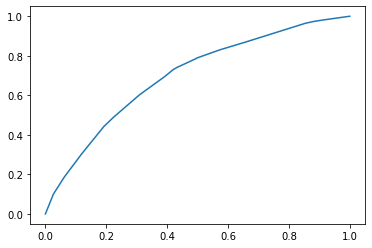

col_0,0,1
0,,
0.0,0.579439,0.420561
1.0,0.269159,0.730841


,value
accuracy,0.655140
balanced_accuracy,0.655140
precision,0.634740
recall,0.730841
f1,0.679409
average_precision,0.665186
AUC,0.698274


LinearLearner


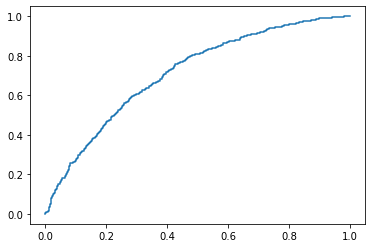

col_0,0,1
0,,
0.0,0.417757,0.582243
1.0,0.142056,0.857944


,value
accuracy,0.637850
balanced_accuracy,0.637850
precision,0.595717
recall,0.857944
f1,0.703179
average_precision,0.680886
AUC,0.712177





discount
XGBoost


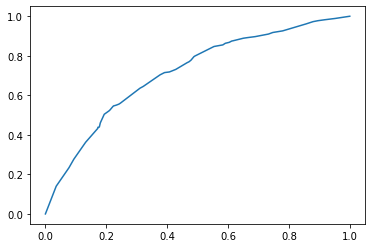

col_0,0,1
0,,
0.0,0.689211,0.310789
1.0,0.363929,0.636071


,value
accuracy,0.662641
balanced_accuracy,0.662641
precision,0.671769
recall,0.636071
f1,0.653433
average_precision,0.686181
AUC,0.714602


LinearLearner


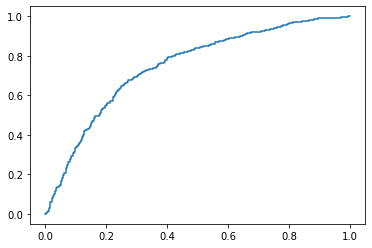

col_0,0,1
0,,
0.0,0.439614,0.560386
1.0,0.132045,0.867955


,value
accuracy,0.653784
balanced_accuracy,0.653784
precision,0.607666
recall,0.867955
f1,0.714854
average_precision,0.706193
AUC,0.747288





info
XGBoost


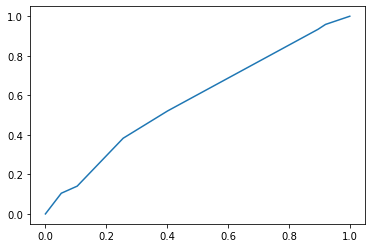

col_0,0,1
0,,
0.0,0.598901,0.401099
1.0,0.479339,0.520661


,value
accuracy,0.559835
balanced_accuracy,0.559781
precision,0.564179
recall,0.520661
f1,0.541547
average_precision,0.557183
AUC,0.575519


LinearLearner


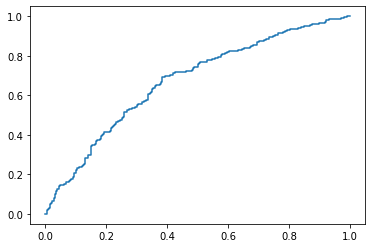

col_0,0,1
0,,
0.0,0.192308,0.807692
1.0,0.066116,0.933884


,value
accuracy,0.562586
balanced_accuracy,0.563096
precision,0.535545
recall,0.933884
f1,0.680723
average_precision,0.642065
AUC,0.671124


In [57]:
for prefix in ['bogo', 'discount', 'info']:
    print(prefix)
    
    # Load ground truth
    y_test = pd.read_csv(f'./data/{prefix}/{prefix}_test_tgt.csv', squeeze=True, header=None)
    
    # XGBoost predictions
    print('XGBoost')
    y_prob = pd.read_csv(f'./data/{prefix}/{prefix}_xgb_preds/{prefix}_test.csv.out', squeeze=True, header=None)
    display(assess_model(y_test, y_prob))

    # LinearLearner predictions
    print('LinearLearner')
    with open(f'./data/{prefix}/{prefix}_ll_preds/{prefix}_test.csv.out', 'r') as f:
        jsons = [json.loads(x.replace('\n', '')) for x in f.readlines()]
    res = pd.DataFrame(jsons)
    display(assess_model(y_test, res['score'].values, y_pred=res['predicted_label'].values))
    
    print('\n\n')